LAG 7

Para que las pruebas sean más rapidas voy a coger una o dos series de cada cluster:


Cluster 0:
['ACCIONA','INDITEX']

Cluster 1:
['INM. COLONIAL']

Cluster 2:
['AENA', 'SANTANDER']

Cluster 3:
['ARCELORMITTAL', 'BBVA']

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/IBEX35_cotizaciones_20_Limpio.csv", sep=",")
df

,Fecha,Empresa,Precio_cierre
0,NaN,NaN,NaN
1,2005-04-01,ACCIONA,36.337158
2,2005-04-04,ACCIONA,35.794037
3,2005-04-05,ACCIONA,36.233715
4,2005-04-06,ACCIONA,36.388882
...,...,...,...
151101,2025-03-26,UNICAJA BANCO,1.774000
151102,2025-03-27,UNICAJA BANCO,1.749000
151103,2025-03-28,UNICAJA BANCO,1.710000
151104,2025-03-31,UNICAJA BANCO,1.706000


In [3]:
df_ACCIONA = df[df["Empresa"] == "ACCIONA"]
df_INDITEX = df[df["Empresa"] == "INDITEX"]
df_AENA = df[df["Empresa"] == "AENA"]
df_ARCELORMITTAL = df[df["Empresa"] == "ARCELORMITTAL"]
df_BBVA = df[df["Empresa"] == "BBVA"]
df_INM_COLONIAL = df[df["Empresa"] == "INM. COLONIAL"]
df_SANTANDER = df[df["Empresa"] == "SANTANDER"]



In [4]:
empresas_prueba = [df_ACCIONA, df_INDITEX, df_AENA, df_ARCELORMITTAL, df_BBVA, df_INM_COLONIAL, df_SANTANDER]


In [5]:
# Paso 1: Asegurar formato correcto y limpiar columnas para cada DataFrame de la lista
for i in range(len(empresas_prueba)):
    df = empresas_prueba[i].copy()  # Copia del DataFrame
    df.reset_index(inplace=True)  # Por si 'Fecha' es índice
    df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')
    df['Precio_cierre'] = pd.to_numeric(df['Precio_cierre'], errors='coerce')
    df = df[['Fecha', 'Precio_cierre']].set_index('Fecha')
    empresas_prueba[i] = df  # Reasignar el DataFrame procesado

# Paso 2: Añadir columnas de tiempo a cada DataFrame
for df in empresas_prueba:
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['quarter'] = df.index.quarter
    df['day'] = df.index.day
    df['day_of_week'] = df.index.dayofweek
    df['week_of_year'] = df.index.isocalendar().week

# Paso 3: Crear variables lag con 7 días
for df in empresas_prueba:
    df['Precio_cierre_lag7'] = df['Precio_cierre'].shift(7)
    df['year_lag7'] = df['year'].shift(7)
    df['month_lag7'] = df['month'].shift(7)
    df['quarter_lag7'] = df['quarter'].shift(7)
    df['day_of_week_lag7'] = df['day_of_week'].shift(7)
    df['week_of_year_lag7'] = df['week_of_year'].shift(7)

# Paso 4: Calcular medias y desviaciones móviles con lag 7
for df in empresas_prueba:
    for window in [7, 30, 60]:
        df[f'rolling_mean_{window}_lag7'] = df['Precio_cierre'].shift(7).rolling(window=window).mean()
        df[f'rolling_std_{window}_lag7'] = df['Precio_cierre'].shift(7).rolling(window=window).std()

# Paso 5: Reasignar los DataFrames modificados a sus nombres originales
df_ACCIONA, df_INDITEX, df_AENA, df_ARCELORMITTAL, df_BBVA, df_INM_COLONIAL, df_SANTANDER = empresas_prueba


In [6]:
for df in empresas_prueba:
    df.dropna(inplace=True)


In [7]:
df_AENA

,Precio_cierre,year,month,quarter,day,day_of_week,week_of_year,Precio_cierre_lag7,year_lag7,month_lag7,quarter_lag7,day_of_week_lag7,week_of_year_lag7,rolling_mean_7_lag7,rolling_std_7_lag7,rolling_mean_30_lag7,rolling_std_30_lag7,rolling_mean_60_lag7,rolling_std_60_lag7
Fecha,,,,,,,,,,,,,,,,,,,
2015-05-19,73.632004,2015,5,2,19,1,21,68.286186,2015.0,5.0,2.0,4.0,19,67.077661,1.626290,70.001013,4.183333,65.980844,5.462861
2015-05-20,72.796974,2015,5,2,20,2,21,68.949539,2015.0,5.0,2.0,0.0,20,67.724288,1.251634,70.209123,3.957100,66.219520,5.267840
2015-05-21,72.812584,2015,5,2,21,3,21,69.144638,2015.0,5.0,2.0,1.0,20,68.247164,0.864724,70.415672,3.719623,66.461448,5.055558
2015-05-22,71.993149,2015,5,2,22,4,21,69.581673,2015.0,5.0,2.0,2.0,20,68.318516,0.960422,70.549904,3.609176,66.658633,4.939439
2015-05-25,70.471352,2015,5,2,25,0,22,73.171577,2015.0,5.0,2.0,3.0,20,69.133493,1.987957,70.660723,3.637777,66.935160,4.828827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-26,218.800003,2025,3,1,26,2,13,217.000000,2025.0,3.0,1.0,0.0,12,215.314285,2.749199,215.366667,3.151391,207.985000,8.122220
2025-03-27,219.199997,2025,3,1,27,3,13,219.000000,2025.0,3.0,1.0,1.0,12,215.542858,3.006026,215.713334,2.946738,208.360000,8.102358
2025-03-28,219.800003,2025,3,1,28,4,13,218.199997,2025.0,3.0,1.0,2.0,12,215.628571,3.082052,215.920000,2.894275,208.680000,8.105571


In [8]:
# Definir fecha de corte
fecha_test = '2022-04-01'

# Recorrer cada DataFrame en la lista empresas_prueba
for idx, df in enumerate(empresas_prueba):
    # División en train y test según la fecha de corte
    train = df[df.index < fecha_test].copy()
    test = df[df.index >= fecha_test].copy()

    # Separar features (X) y target (y)
    X_train = train.drop(columns=['Precio_cierre'])
    y_train = train['Precio_cierre']

    X_test = test.drop(columns=['Precio_cierre'])
    y_test = test['Precio_cierre']

    # Mostrar resultados de la división
    print(f"DataFrame {idx+1}:")
    print(f"Train: {train.index.min().date()} → {train.index.max().date()}")
    print(f"Test : {test.index.min().date()} → {test.index.max().date()}")
    print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
    print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")
    print("-" * 50)


DataFrame 1:
Train: 2005-07-04 → 2022-03-31
Test : 2022-04-01 → 2025-04-01
X_train shape: (4282, 18), y_train shape: (4282,)
X_test shape: (768, 18), y_test shape: (768,)
--------------------------------------------------
DataFrame 2:
Train: 2005-07-04 → 2022-03-31
Test : 2022-04-01 → 2025-04-01
X_train shape: (4282, 18), y_train shape: (4282,)
X_test shape: (768, 18), y_test shape: (768,)
--------------------------------------------------
DataFrame 3:
Train: 2015-05-19 → 2022-03-31
Test : 2022-04-01 → 2025-04-01
X_train shape: (1761, 18), y_train shape: (1761,)
X_test shape: (768, 18), y_test shape: (768,)
--------------------------------------------------
DataFrame 4:
Train: 2006-10-30 → 2022-03-31
Test : 2022-04-01 → 2025-04-01
X_train shape: (3940, 18), y_train shape: (3940,)
X_test shape: (768, 18), y_test shape: (768,)
--------------------------------------------------
DataFrame 5:
Train: 2005-07-04 → 2022-03-31
Test : 2022-04-01 → 2025-04-01
X_train shape: (4282, 18), y_train sh

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import numpy as np

# Definir modelos
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': xgb.XGBRegressor(),
    'SVR': SVR(),
    'MLP Regressor': MLPRegressor(max_iter=500)  # Red neuronal
}

# Hiperparámetros
param_grids = {
    'Linear Regression': {},
    'Decision Tree': {
        'max_depth': [5, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [5, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7]
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7]
    },
    'SVR': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'MLP Regressor': {
        'hidden_layer_sizes': [(50,), (100,), (100, 50)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam'],
        'alpha': [0.0001, 0.001]
    }
}

# Función para evaluar los modelos
def evaluate_models(X_train, y_train, X_test, y_test, models, param_grids):
    model_rmse = {}

    for model_name, model in models.items():
        print(f"\nEntrenando {model_name}...")

        grid_search = GridSearchCV(
            estimator=model,
            param_grid=param_grids[model_name],
            scoring='neg_root_mean_squared_error',
            cv=3,
            verbose=1,
            n_jobs=-1
        )

        grid_search.fit(X_train, y_train)
        best_estimator = grid_search.best_estimator_
        best_score = -grid_search.best_score_

        print(f"Mejor RMSE (CV) para {model_name}: {best_score:.4f}")

        y_pred = best_estimator.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        print(f"RMSE en test para {model_name}: {rmse:.4f}")

        model_rmse[model_name] = rmse

    return model_rmse

# Guardar RMSE medios por modelo
model_rmse_mean = {model_name: [] for model_name in models.keys()}


MISMO MODELO PARA TODAS -> EL DE MENOR RMSE MEDIO

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import numpy as np

# Definir modelos
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': xgb.XGBRegressor(),
    'SVR': SVR(),
    'MLP Regressor': MLPRegressor(max_iter=500)  # Red neuronal
}

# Hiperparámetros
param_grids = {
    'Linear Regression': {},
    'Decision Tree': {
        'max_depth': [5, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [5, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7]
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7]
    },
    'SVR': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'MLP Regressor': {
        'hidden_layer_sizes': [(50,), (100,), (100, 50)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam'],
        'alpha': [0.0001, 0.001]
    }
}

# Función para evaluar los modelos
def evaluate_models(X_train, y_train, X_test, y_test, models, param_grids):
    model_rmse = {}

    for model_name, model in models.items():
        print(f"\nEntrenando {model_name}...")

        grid_search = GridSearchCV(
            estimator=model,
            param_grid=param_grids[model_name],
            scoring='neg_root_mean_squared_error',
            cv=3,
            verbose=1,
            n_jobs=-1
        )

        grid_search.fit(X_train, y_train)
        best_estimator = grid_search.best_estimator_
        best_score = -grid_search.best_score_

        print(f"Mejor RMSE (CV) para {model_name}: {best_score:.4f}")

        y_pred = best_estimator.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        print(f"RMSE en test para {model_name}: {rmse:.4f}")

        model_rmse[model_name] = rmse

    return model_rmse

# Guardar RMSE medios por modelo
model_rmse_mean = {model_name: [] for model_name in models.keys()}

# Recorrer cada DataFrame en la lista cluster0
for idx, df in enumerate(empresas_prueba):
    # División en train y test
    train = df[df.index < fecha_test]
    test = df[df.index >= fecha_test]

    # Separar features (X) y target (y) en train
    X_train, y_train = train.drop(columns=['Precio_cierre']), train['Precio_cierre']

    # Separar features (X) y target (y) en test
    X_test, y_test = test.drop(columns=['Precio_cierre']), test['Precio_cierre']

    # Escalar los datos
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Evaluar los modelos para la serie
    print(f"\nEvaluando modelos para la serie {idx + 1}...")
    model_rmse = evaluate_models(
        X_train_scaled, y_train, X_test_scaled, y_test,
        models, param_grids
    )

    # Guardar RMSE para cada modelo
    for model_name, rmse in model_rmse.items():
        model_rmse_mean[model_name].append(rmse)

# Calcular RMSE medio para cada modelo
mean_rmse = {model_name: np.mean(rmses) for model_name, rmses in model_rmse_mean.items()}

# Seleccionar el modelo con menor RMSE medio
best_model_name = min(mean_rmse, key=mean_rmse.get)
print(f"\n✅ El mejor modelo es: {best_model_name} con RMSE medio = {mean_rmse[best_model_name]:.4f}")


Evaluando modelos para la serie 1...

Entrenando Linear Regression...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Mejor RMSE (CV) para Linear Regression: 3.7249
RMSE en test para Linear Regression: 6.3078

Entrenando Decision Tree...
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Mejor RMSE (CV) para Decision Tree: 9.2058
RMSE en test para Decision Tree: 16.9163

Entrenando Random Forest...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mejor RMSE (CV) para Random Forest: 7.7013
RMSE en test para Random Forest: 17.8942

Entrenando Gradient Boosting...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mejor RMSE (CV) para Gradient Boosting: 7.4516
RMSE en test para Gradient Boosting: 16.9520

Entrenando XGBoost...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mejor RMSE (CV) para XGBoost: 7.9350
RMSE en test para XGBoost: 16.6305

Entrenando SVR...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Mejor RMSE

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Mejor RMSE (CV) para MLP Regressor: 6.7237
RMSE en test para MLP Regressor: 13.1835

Evaluando modelos para la serie 2...

Entrenando Linear Regression...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Mejor RMSE (CV) para Linear Regression: 0.7440
RMSE en test para Linear Regression: 1.5255

Entrenando Decision Tree...
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Mejor RMSE (CV) para Decision Tree: 3.3721
RMSE en test para Decision Tree: 11.5827

Entrenando Random Forest...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mejor RMSE (CV) para Random Forest: 3.0412
RMSE en test para Random Forest: 11.5687

Entrenando Gradient Boosting...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mejor RMSE (CV) para Gradient Boosting: 2.8126
RMSE en test para Gradient Boosting: 12.5411

Entrenando XGBoost...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mejor RMSE (CV) para XGBoost: 4.8407
RMSE en test para XGBoost: 12.8024

Entre

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Mejor RMSE (CV) para MLP Regressor: 25.2573
RMSE en test para MLP Regressor: 17.5928

Evaluando modelos para la serie 4...

Entrenando Linear Regression...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Mejor RMSE (CV) para Linear Regression: 2.4577
RMSE en test para Linear Regression: 1.3523

Entrenando Decision Tree...
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Mejor RMSE (CV) para Decision Tree: 11.0621
RMSE en test para Decision Tree: 1.4244

Entrenando Random Forest...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mejor RMSE (CV) para Random Forest: 10.7422
RMSE en test para Random Forest: 1.2418

Entrenando Gradient Boosting...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mejor RMSE (CV) para Gradient Boosting: 10.8088
RMSE en test para Gradient Boosting: 1.7744

Entrenando XGBoost...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mejor RMSE (CV) para XGBoost: 10.9358
RMSE en test para XGBoost: 1.5119

Entr

MODELO DISTINTO PARA CADA UNA -> EL DE MENOR RMSE

In [13]:
# Diccionario para guardar los mejores modelos para cada serie
best_models_for_each_series = {}

# Recorrer cada DataFrame en la lista empresas_prueba
for idx, df in enumerate(empresas_prueba):
    # División en train y test
    train = df[df.index < fecha_test]
    test = df[df.index >= fecha_test]

    # Separar features (X) y target (y) en train
    X_train, y_train = train.drop(columns=['Precio_cierre']), train['Precio_cierre']

    # Separar features (X) y target (y) en test
    X_test, y_test = test.drop(columns=['Precio_cierre']), test['Precio_cierre']

    # Escalar los datos
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Evaluar los modelos para la serie
    print(f"\nEvaluando modelos para la serie {idx + 1}...")
    model_rmse = evaluate_models(
        X_train_scaled, y_train, X_test_scaled, y_test,
        models, param_grids
    )

    # Seleccionar el modelo con menor RMSE para esta serie
    best_model_name = min(model_rmse, key=model_rmse.get)
    best_rmse = model_rmse[best_model_name]
    print(f"✅ El mejor modelo para la serie {idx + 1} es: {best_model_name} con RMSE = {best_rmse:.4f}")

    # Guardar el mejor modelo para la serie
    best_models_for_each_series[idx] = {
        'model': best_model_name,
        'rmse': best_rmse
    }

# Calcular el RMSE medio de los mejores modelos para cada serie
all_rmses = [result['rmse'] for result in best_models_for_each_series.values()]
average_rmse = np.mean(all_rmses)
print(f"\nRMSE medio de los mejores modelos para cada serie: {average_rmse:.4f}")


Evaluando modelos para la serie 1...

Entrenando Linear Regression...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Mejor RMSE (CV) para Linear Regression: 3.7249
RMSE en test para Linear Regression: 6.3078

Entrenando Decision Tree...
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Mejor RMSE (CV) para Decision Tree: 9.0235
RMSE en test para Decision Tree: 20.7792

Entrenando Random Forest...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mejor RMSE (CV) para Random Forest: 7.6182
RMSE en test para Random Forest: 17.7784

Entrenando Gradient Boosting...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mejor RMSE (CV) para Gradient Boosting: 7.4459
RMSE en test para Gradient Boosting: 17.0706

Entrenando XGBoost...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mejor RMSE (CV) para XGBoost: 7.9350
RMSE en test para XGBoost: 16.6305

Entrenando SVR...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Mejor RMSE

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Mejor RMSE (CV) para MLP Regressor: 23.7709
RMSE en test para MLP Regressor: 18.8856
✅ El mejor modelo para la serie 3 es: SVR con RMSE = 5.1783

Evaluando modelos para la serie 4...

Entrenando Linear Regression...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Mejor RMSE (CV) para Linear Regression: 2.4577
RMSE en test para Linear Regression: 1.3523

Entrenando Decision Tree...
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Mejor RMSE (CV) para Decision Tree: 11.0621
RMSE en test para Decision Tree: 1.4244

Entrenando Random Forest...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mejor RMSE (CV) para Random Forest: 10.7441
RMSE en test para Random Forest: 1.6564

Entrenando Gradient Boosting...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mejor RMSE (CV) para Gradient Boosting: 10.7754
RMSE en test para Gradient Boosting: 1.7099

Entrenando XGBoost...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mejor RMSE (CV) p

PREDICCIONES:


🔍 Procesando serie: ACCIONA
⚙️ Ajustando modelo: SVR
📉 RMSE para ACCIONA: 6.2247


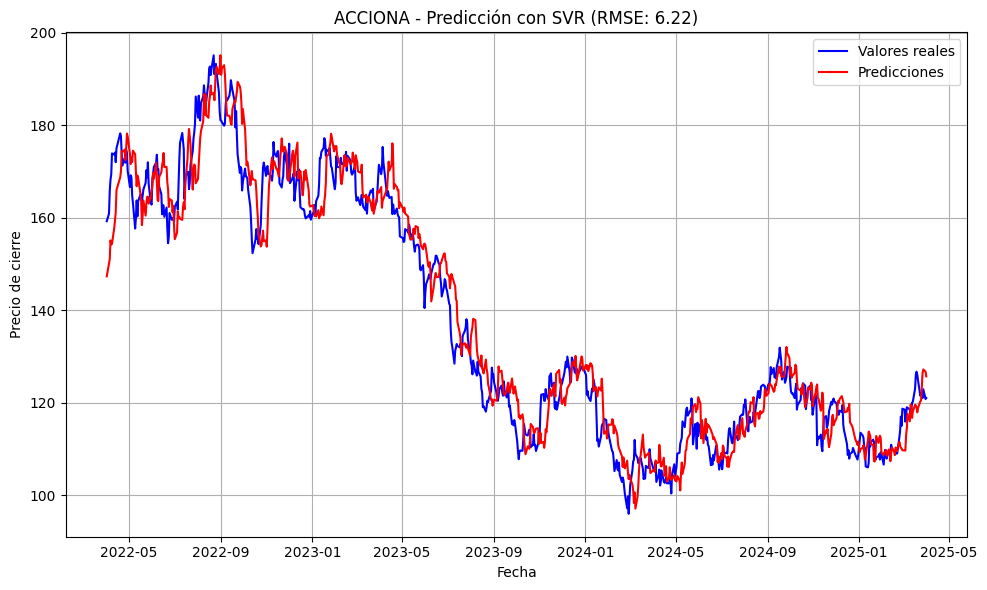


🔍 Procesando serie: INDITEX
⚙️ Ajustando modelo: SVR
📉 RMSE para INDITEX: 1.5100


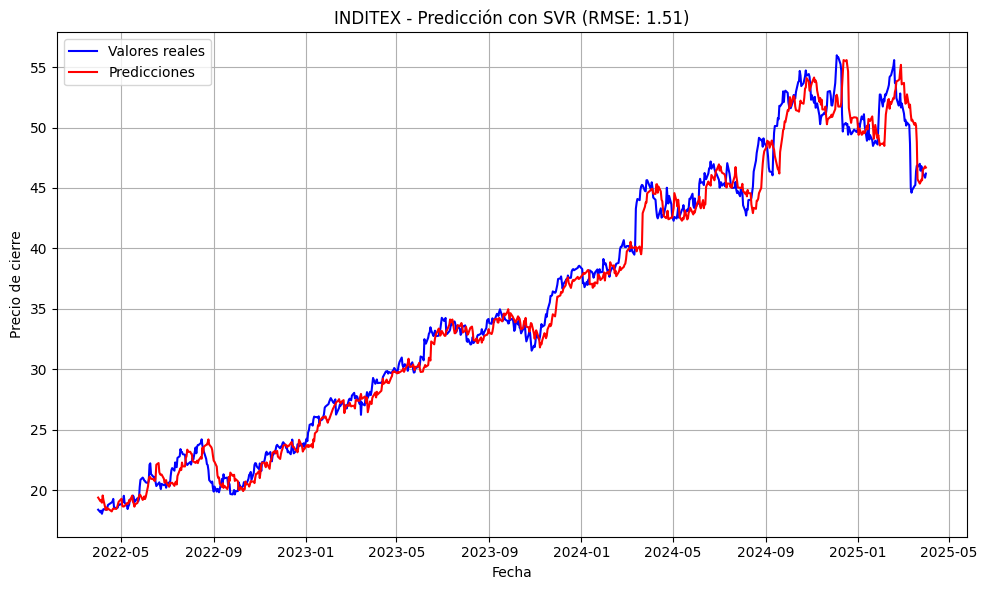


🔍 Procesando serie: AENA
⚙️ Ajustando modelo: SVR
📉 RMSE para AENA: 5.1783


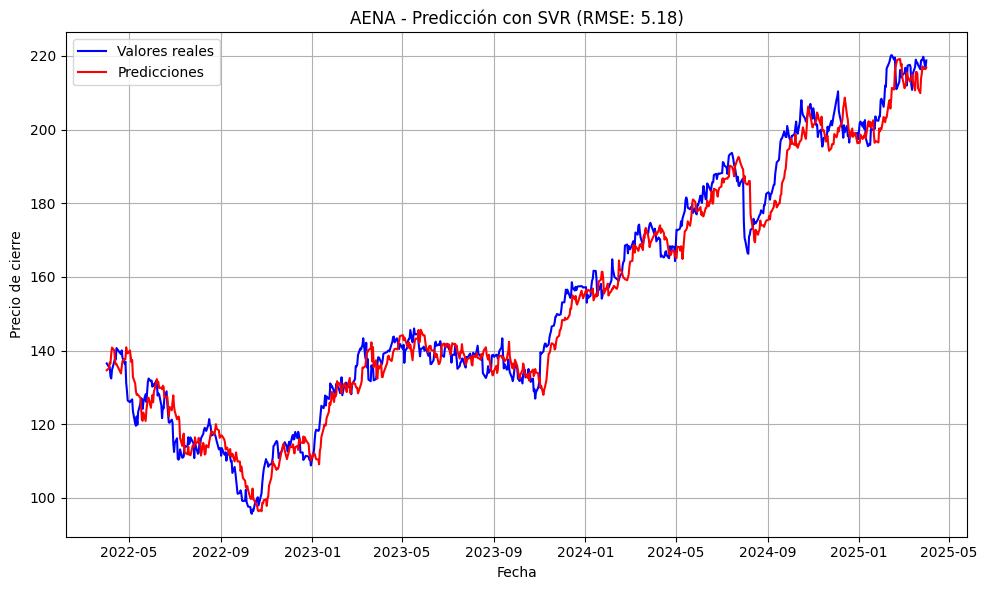


🔍 Procesando serie: ARCELORMITTAL
⚙️ Ajustando modelo: SVR
📉 RMSE para ARCELORMITTAL: 1.3069


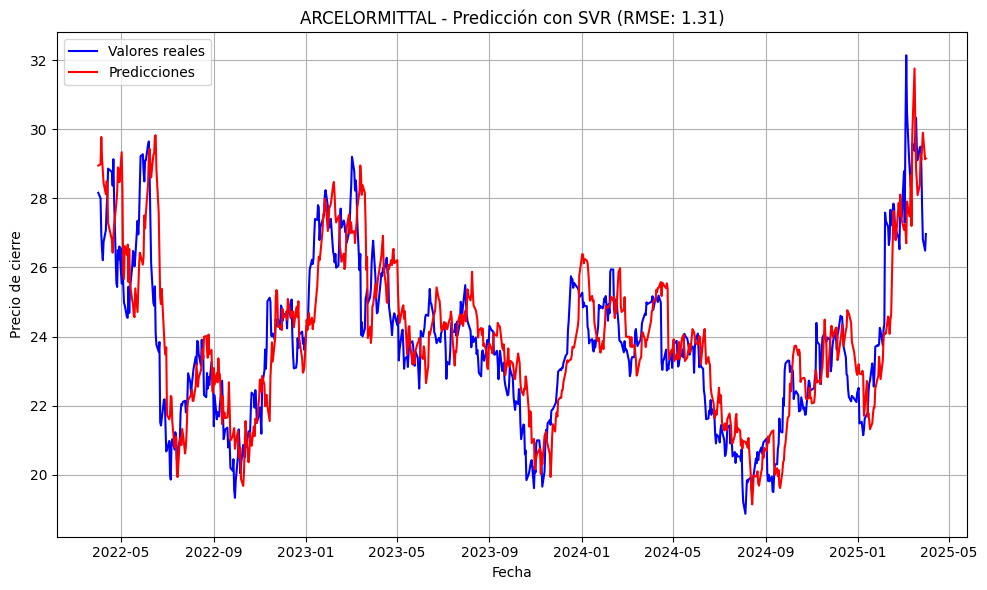


🔍 Procesando serie: BBVA
⚙️ Ajustando modelo: SVR
📉 RMSE para BBVA: 0.3891


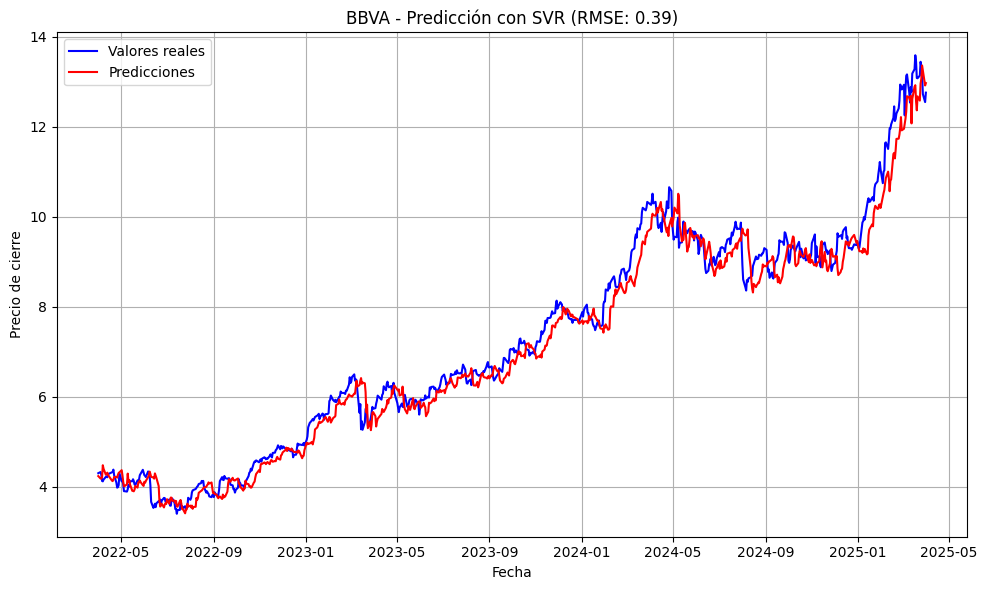


🔍 Procesando serie: INM. COLONIAL
⚙️ Ajustando modelo: SVR
📉 RMSE para INM. COLONIAL: 0.2802


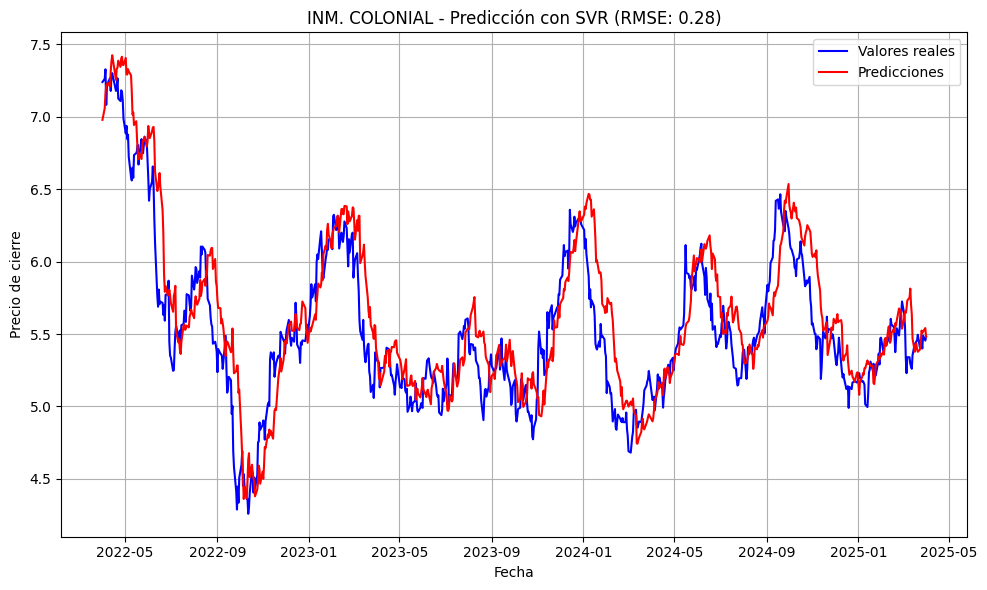


🔍 Procesando serie: SANTANDER
⚙️ Ajustando modelo: SVR
📉 RMSE para SANTANDER: 0.1943


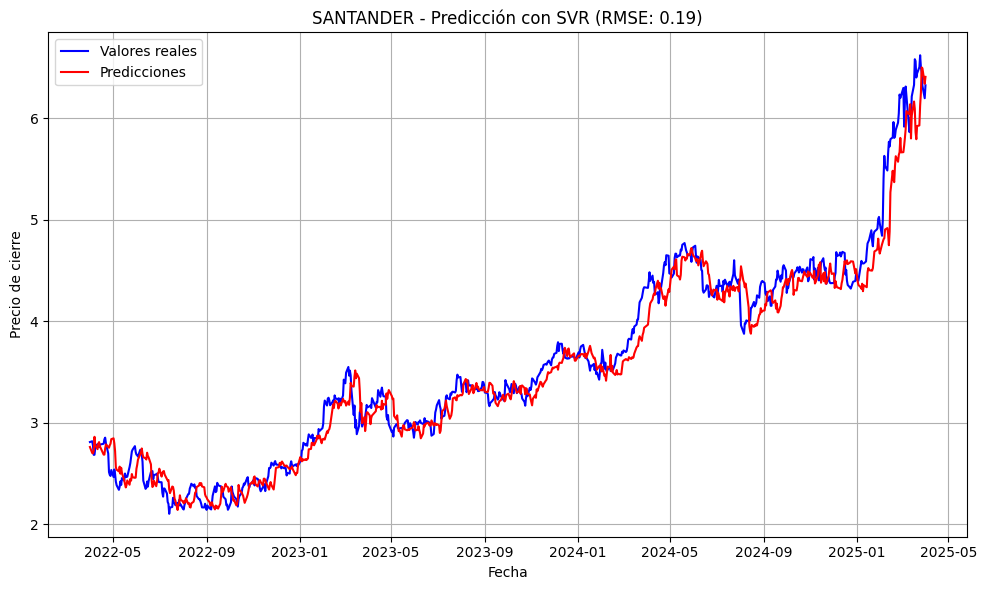

In [14]:
empresas = ['ACCIONA','INDITEX', 'AENA', 'ARCELORMITTAL', 'BBVA', 'INM. COLONIAL', 'SANTANDER'] # Define the empresas variable with company names
import matplotlib.pyplot as plt

# Recorrer cada DataFrame y graficar predicciones con el mejor modelo
for idx, (nombre, df) in enumerate(zip(empresas, empresas_prueba)):
    print(f"\n🔍 Procesando serie: {nombre}")

    # División en train y test
    train = df[df.index < fecha_test]
    test = df[df.index >= fecha_test]

    X_train, y_train = train.drop(columns=['Precio_cierre']), train['Precio_cierre']
    X_test, y_test = test.drop(columns=['Precio_cierre']), test['Precio_cierre']

    # Escalado
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Volver a ajustar solo el mejor modelo con GridSearchCV
    print(f"⚙️ Ajustando modelo: {best_model_name}")
    grid = GridSearchCV(
        estimator=models[best_model_name],
        param_grid=param_grids[best_model_name],
        scoring='neg_root_mean_squared_error',
        cv=3,
        verbose=0,
        n_jobs=-1
    )
    grid.fit(X_train_scaled, y_train)
    best_model = grid.best_estimator_

    # Predecir
    y_pred = best_model.predict(X_test_scaled)

    # Calcular RMSE en test
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"📉 RMSE para {nombre}: {rmse:.4f}")

    # Graficar
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.index, y_test, label='Valores reales', color='blue')
    plt.plot(y_test.index, y_pred, label='Predicciones', color='red')
    plt.title(f"{nombre} - Predicción con {best_model_name} (RMSE: {rmse:.2f})")
    plt.xlabel("Fecha")
    plt.ylabel("Precio de cierre")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
